In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image, ImageSequence

# Processed tif file reading

In [2]:
# ファイルパス
file_path = "LinearDecay.tif"
Zcount = 735

# 画像を読み込み
img_pil = Image.open(file_path)
    # 画像データを取得
img_0=[]

z=0
for z in range(0,Zcount):
    img_pil.seek(z)
    image_data = np.array(img_pil)
    img_0.append(image_data)


# plt.imshow(img_0[400])

# # 画像情報の確認
# print(len(img_0))  # 画像の形状
# print(img_0[400][20][20])  # データ型

# img_pil.close()

# Simple sum

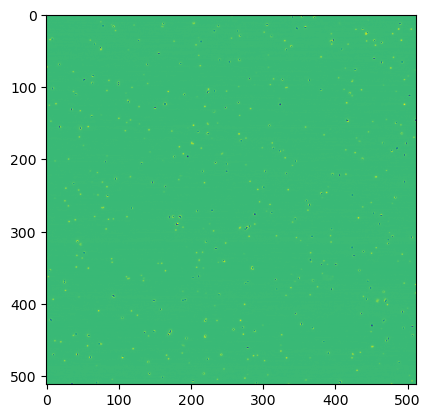

In [3]:
z = 0
img2D = np.zeros_like(img_0[0])
for z in range(0,len(img_0)-1):
    img2D = img2D + img_0[z]
plt.imshow(img2D)

# Noize filtered sum

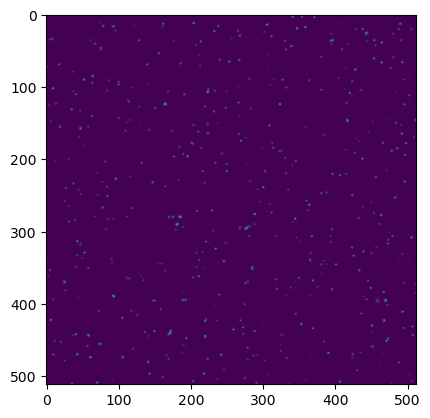

In [4]:
z = 0
img2Dfilt = np.zeros_like(img_0[0])
for z in range(0,len(img_0)-1):
    Ith = -590/(Zcount-1)*z + 600
    for x in range(0,len(img_0[z])):
        for y in range(0, len(img_0[z][x])):
            if img_0[z][x][y] < Ith:
                img_0[z][x][y] = 1
    img2Dfilt = img2Dfilt + img_0[z]
    
plt.imshow(img2Dfilt)

# Original tif reading

735
488


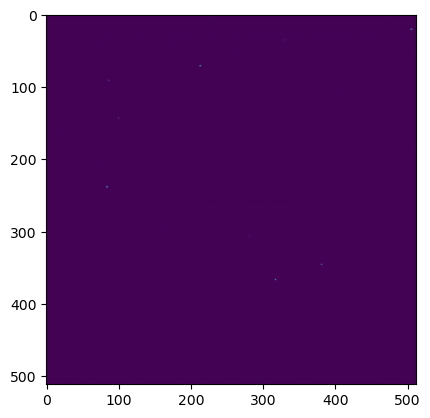

In [5]:
# ファイルパス
file_path = "../../Data/20240416/C1-beads_150424.tif"
Zcount = 735

# 画像を読み込み
img_pil = Image.open(file_path)
    # 画像データを取得
img_0=[]

i=0
for i in range(0,Zcount):
    img_pil.seek(i)
    image_data = np.array(img_pil)
    img_0.append(image_data)


plt.imshow(img_0[400])

# 画像情報の確認
print(len(img_0))  # 画像の形状
print(img_0[400][20][20])  # データ型

img_pil.close()

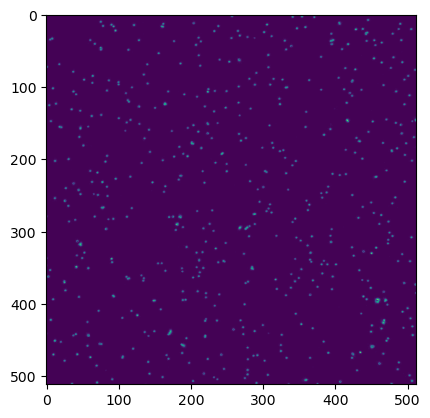

In [6]:
z = 0
img2Dfilt = np.zeros_like(img_0[0])
for z in range(0,len(img_0)-1):
    # Ith = -590/(Zcount-1)*z + 600
    for x in range(0,len(img_0[z])):
        for y in range(0, len(img_0[z][x])):
            if img_0[z][x][y] < 600:
                img_0[z][x][y] = 1
    img2Dfilt = img2Dfilt + img_0[z]


plt.imshow(img2Dfilt)


In [7]:
im = Image.fromarray(img2Dfilt)
im.save('img2Dfilt.tif')